In [ ]:
### Fraud detection 
### Done this on my own using iris classification & sales prediction knowledge.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
fraud=pd.read_csv('D:/CodSoft/Task 5/creditcard.csv')

In [4]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
fraud.shape

(284807, 31)

In [7]:
fraud.size

8829017

In [8]:
fraud.columns=fraud.columns.str.lower()

In [9]:
fraud.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [10]:
fraud.isna().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64

In [11]:
fraud.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [12]:
fraud[fraud.duplicated(subset=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
                               'class'],keep=False)]

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [13]:
fraud.drop_duplicates(subset=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],keep='first',inplace=True)

In [14]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    283726 non-null  float64
 1   v1      283726 non-null  float64
 2   v2      283726 non-null  float64
 3   v3      283726 non-null  float64
 4   v4      283726 non-null  float64
 5   v5      283726 non-null  float64
 6   v6      283726 non-null  float64
 7   v7      283726 non-null  float64
 8   v8      283726 non-null  float64
 9   v9      283726 non-null  float64
 10  v10     283726 non-null  float64
 11  v11     283726 non-null  float64
 12  v12     283726 non-null  float64
 13  v13     283726 non-null  float64
 14  v14     283726 non-null  float64
 15  v15     283726 non-null  float64
 16  v16     283726 non-null  float64
 17  v17     283726 non-null  float64
 18  v18     283726 non-null  float64
 19  v19     283726 non-null  float64
 20  v20     283726 non-null  float64
 21  v21     28

In [15]:
fraud.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


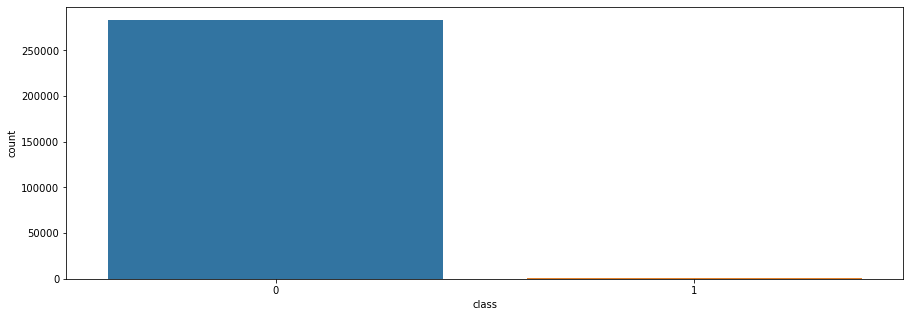

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud,x='class')

In [17]:
fraud['class'].value_counts().to_frame()

,class
0,283253
1,473


In [18]:
from sklearn.utils import resample

In [19]:
fraud_majority=fraud[fraud['class']==0]
fraud_minority=fraud[fraud['class']==1]

In [20]:
fraud_majority_downsample=resample(fraud_majority,n_samples=473,replace=False,random_state=42)

In [21]:
fraud_df=pd.concat([fraud_majority_downsample,fraud_minority])

In [22]:
fraud_df['class'].value_counts().to_frame()

,class
1,473
0,473


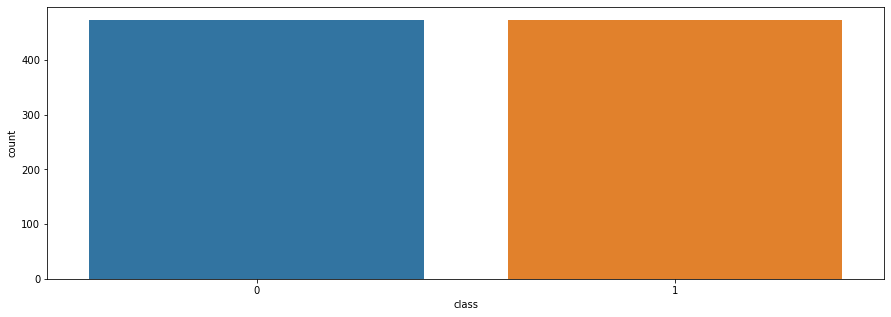

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud_df,x='class')

In [24]:
fraud_df.corr()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1.000000,0.260808,-0.247373,0.180673,-0.245011,0.308935,0.163260,0.243830,-0.198337,0.193129,...,-0.055685,0.094389,0.076133,-0.000043,-0.197178,-0.048243,-0.135243,0.018830,0.025681,-0.175596
v1,0.260808,1.000000,-0.781145,0.871437,-0.599812,0.859462,0.365009,0.867281,-0.227559,0.636138,...,0.109783,-0.091185,0.004507,-0.074499,-0.107965,0.053400,0.104882,0.151901,-0.036482,-0.414065
v2,-0.247373,-0.781145,1.000000,-0.846292,0.671447,-0.782957,-0.365287,-0.825480,0.143313,-0.680223,...,-0.101683,0.103932,0.087695,-0.003433,0.135224,-0.006763,-0.094864,0.024285,-0.267597,0.473475
v3,0.180673,0.871437,-0.846292,1.000000,-0.757869,0.846066,0.495779,0.883227,-0.289173,0.748648,...,0.072457,-0.104319,0.005148,0.029983,-0.108728,-0.032016,0.002408,0.090332,-0.020110,-0.557682
v4,-0.245011,-0.599812,0.671447,-0.757869,1.000000,-0.562285,-0.440084,-0.710487,0.139941,-0.785856,...,-0.049573,0.174882,0.016402,-0.102288,-0.011845,0.127344,0.053355,-0.085654,-0.011463,0.696688
v5,0.308935,0.859462,-0.782957,0.846066,-0.562285,1.000000,0.305056,0.834658,-0.316985,0.635433,...,0.085628,-0.123645,-0.066063,-0.124094,-0.110947,0.053724,0.101633,0.135551,-0.108903,-0.361055
v6,0.163260,0.365009,-0.365287,0.495779,-0.440084,0.305056,1.000000,0.357900,-0.549485,0.366570,...,-0.198321,0.164002,0.256284,-0.017781,-0.157928,-0.015149,-0.224261,-0.070580,0.223830,-0.435321
v7,0.243830,0.867281,-0.825480,0.883227,-0.710487,0.834658,0.357900,1.000000,-0.055355,0.769612,...,0.200895,-0.252839,-0.023010,-0.039487,0.045521,0.011935,0.154534,0.131971,0.139892,-0.471417
v8,-0.198337,-0.227559,0.143313,-0.289173,0.139941,-0.316985,-0.549485,-0.055355,1.000000,-0.096914,...,0.353670,-0.326261,-0.305667,0.032922,0.293254,0.017517,0.382396,0.067638,-0.010708,0.119414
v9,0.193129,0.636138,-0.680223,0.748648,-0.785856,0.635433,0.366570,0.769612,-0.096914,1.000000,...,0.172436,-0.270597,-0.055213,0.038377,-0.011200,-0.141642,0.054325,0.125616,0.025885,-0.552502


In [25]:
df_corr_class=fraud_df.corr()['class'].to_frame()

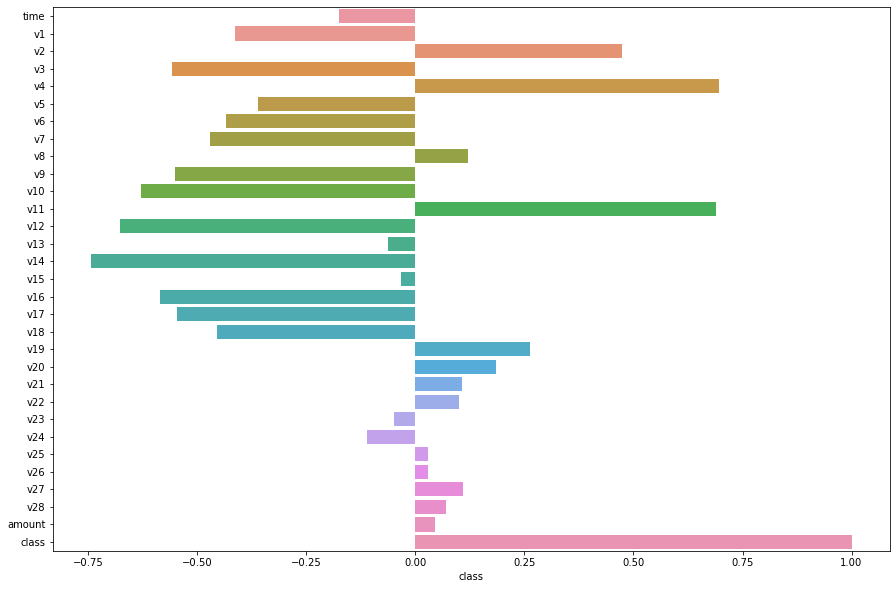

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_corr_class,y=df_corr_class.index,x='class')

In [27]:
x=fraud_df.drop(['class'],axis=1)
y=fraud_df['class']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((662, 30), (284, 30), (662,), (284,))

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression(max_iter=500)

In [33]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [34]:
lr.score(x_train,y_train)

0.945619335347432

In [35]:
lr.score(x_test,y_test)

0.9507042253521126

In [36]:
y_pred=lr.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [38]:
precision_score(y_test,y_pred)

0.9642857142857143

In [39]:
recall_score(y_test,y_pred)

0.9375

In [40]:
accuracy_score(y_test,y_pred)

0.9507042253521126

In [41]:
f1_score(y_test,y_pred)

0.9507042253521126

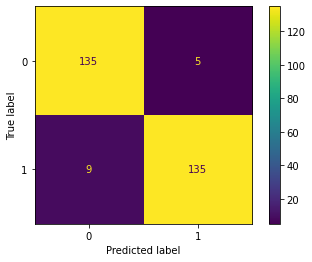

In [42]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()